In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import h5py

In [3]:
f = h5py.File('minosmatch_fuel_me1Bmc_small.hdf5', 'r')

In [4]:
data = {'zs': f['zs'], 'segments': f['segments']}
df = DataFrame(data)

In [6]:
%matplotlib inline

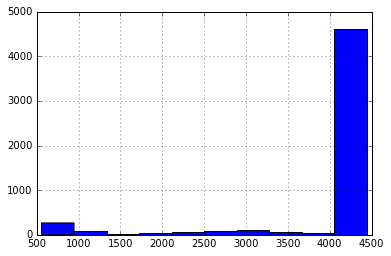

In [15]:
df['zs'][df['segments']==0].hist()

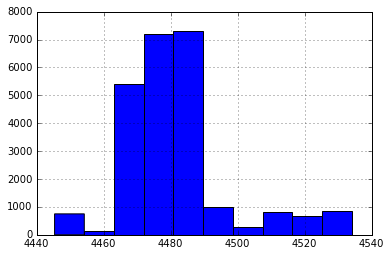

In [30]:
df['zs'][df['segments']==1].hist()

In [16]:
np.max(df['zs'][df['segments']==0])

4445.3301

In [17]:
target1_z = 4481.21
target2_z = 4702.29
target3_z = 4923.36
target4_z = 5644.91
target5_z = 5777.55
target1_thickestW = 25.75
target2_thickestW = 25.75
target3_thickestW = 76.3
target4_thickestW = 28.0
target5_thickestW = 13.0

extraToleranceUp=23.0
extraToleranceDown=40.0

In [18]:
targets_z = [target1_z, target2_z, target3_z, target4_z, target5_z]
targets_w = [target1_thickestW, target2_thickestW, target3_thickestW, target4_thickestW, target5_thickestW]

In [19]:
targets_zw = zip(targets_z, targets_w) 

In [20]:
targets_bounds = [(t - w / 2.0 - extraToleranceUp, t + w / 2.0 + extraToleranceDown) for (t, w) in targets_zw]

In [26]:
for i, t in enumerate(targets_bounds):
    print i+1, t

1 (4445.335, 4534.085)
2 (4666.415, 4755.165)
3 (4862.21, 5001.509999999999)
4 (5607.91, 5698.91)
5 (5748.05, 5824.05)


In [27]:
for i in range(11):
    print i, (np.min(df['zs'][df['segments']==i]), np.max(df['zs'][df['segments']==i]))

0 (557.32397, 4445.3301)
1 (4445.3398, 4534.0801)
2 (4666.4199, 4755.1602)
3 (4862.2202, 5001.5098)
4 (5607.9102, 5698.9102)
5 (5748.0498, 5824.0098)
6 (4534.0898, 4666.4102)
7 (4755.1699, 4862.1899)
8 (5001.5098, 5607.9102)
9 (5698.9199, 5748.0498)
10 (5824.0601, 8238.71)


In [28]:
zsegs = [0, 1, 6, 2, 7, 3, 8, 4, 9, 5, 10]

In [29]:
for i in zsegs:
    print (np.min(df['zs'][df['segments']==i]), np.max(df['zs'][df['segments']==i]))

(557.32397, 4445.3301)
(4445.3398, 4534.0801)
(4534.0898, 4666.4102)
(4666.4199, 4755.1602)
(4755.1699, 4862.1899)
(4862.2202, 5001.5098)
(5001.5098, 5607.9102)
(5607.9102, 5698.9102)
(5698.9199, 5748.0498)
(5748.0498, 5824.0098)
(5824.0601, 8238.71)


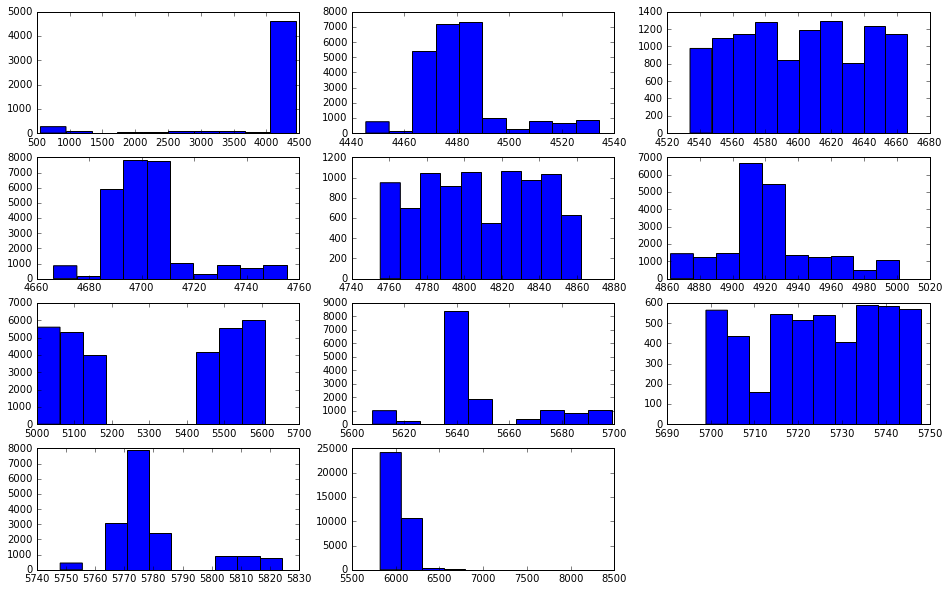

In [33]:
fig = plt.figure(figsize=(16, 10))
gs = plt.GridSpec(4, 3)
for i, v in enumerate(zsegs):
    ax = plt.subplot(gs[i])
    ax.hist(df['zs'][df['segments']==v])